In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set default setting of seaborn
sns.set()

In [2]:
# Read the data
raw_data=pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\Assignment and Projects\Vehicle Performance Prediction\Dataset\data.csv")
# Print the first five rows of the data
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
data = raw_data.copy(deep=True)

#### Understand and Prepare the data

###### DataTypes and Dimensions

In [4]:
# Check the datatype for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
raw_data.shape

(398, 9)

###### Checking for missing values

In [6]:
# Get the count of missing values
missing_values = data.isnull().sum()

# Print the count of missing values
print(missing_values)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64


There are no missing values in the dataset

###### Data Correction

In [7]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

- Horsepower an object and not a float, the value we saw above were clearly numbers. Let's try converting the column using astype()

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

###### Removing '?' from horsepower

In [9]:
data = data[data.horsepower != '?']

In [10]:
'?' in data.horsepower

False

In [11]:
data.shape

(392, 9)

In [12]:
data.horsepower = data.horsepower.astype('float')

In [13]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

###### On to preparing the categorical features:
- model_year is ordinal. So we simply stick to dtype int.
- origin is true categorical. We need to encode it later.
- name actually contains two useful bits of information: the cars manufacturer and the model. We split that into two new columns.

In [14]:
data_1 = data.copy(deep=True)

In [15]:
data_1.origin = data_1.origin.astype('object')

In [16]:
# split() with expand=True yields one column per list element
# We only split on the first space by setting n=1
data_1[['manufacturer','model']]=data_1['name'].str.split(' ',n=1,expand=True)
data_1.drop('name',axis=1,inplace=True)
data_1.head(1).T

,0
origin,1
cylinders,8
displacement,307
horsepower,130
weight,3504
acceleration,12
year,1970
Kilometer_per_liter,7.65259
manufacturer,chevrolet
model,chevelle malibu


In [17]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


###### There are several errors in the manufacturers names. E.g. 'vokswagen','maxda' etc. We fix these by replacing the wrong entries. We also fix some synonyms like 'vw'.

In [18]:
errors = {'vokswagen':'volkswagen',
         'vw':'volkswagen',
          'toyouta':'toyota',
          'mercedes-benz':'mercedes',
          'chevroelt':'chevrolet',
          'chevy':'chevrolet',
          'maxda':'mazda'
         }
data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer) 

In [19]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


###### Some model names also seem redundant or wrong.
Hand checking would be way too time-consuming so we only improve this features brute-force by removing all special characters.

In [20]:
data_1.model.head(10)

0    chevelle malibu
1        skylark 320
2          satellite
3          rebel sst
4             torino
5        galaxie 500
6             impala
7           fury iii
8           catalina
9     ambassador dpl
Name: model, dtype: object

In [21]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+','',(str(x)))

data_1['model']=data_1.model.apply(lambda x: alphanumeric(x))

In [22]:
print(len(data_1.model.unique()))

293


- Now everything looks in order so let's describe the dataset.

###### Statistical Summary

In [23]:
# data frame with numerical features
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [24]:
# data frame with categorical features
data_1.describe(include='object')

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,rabbit
freq,245,48,5


###### EDA

###### PDF's of features

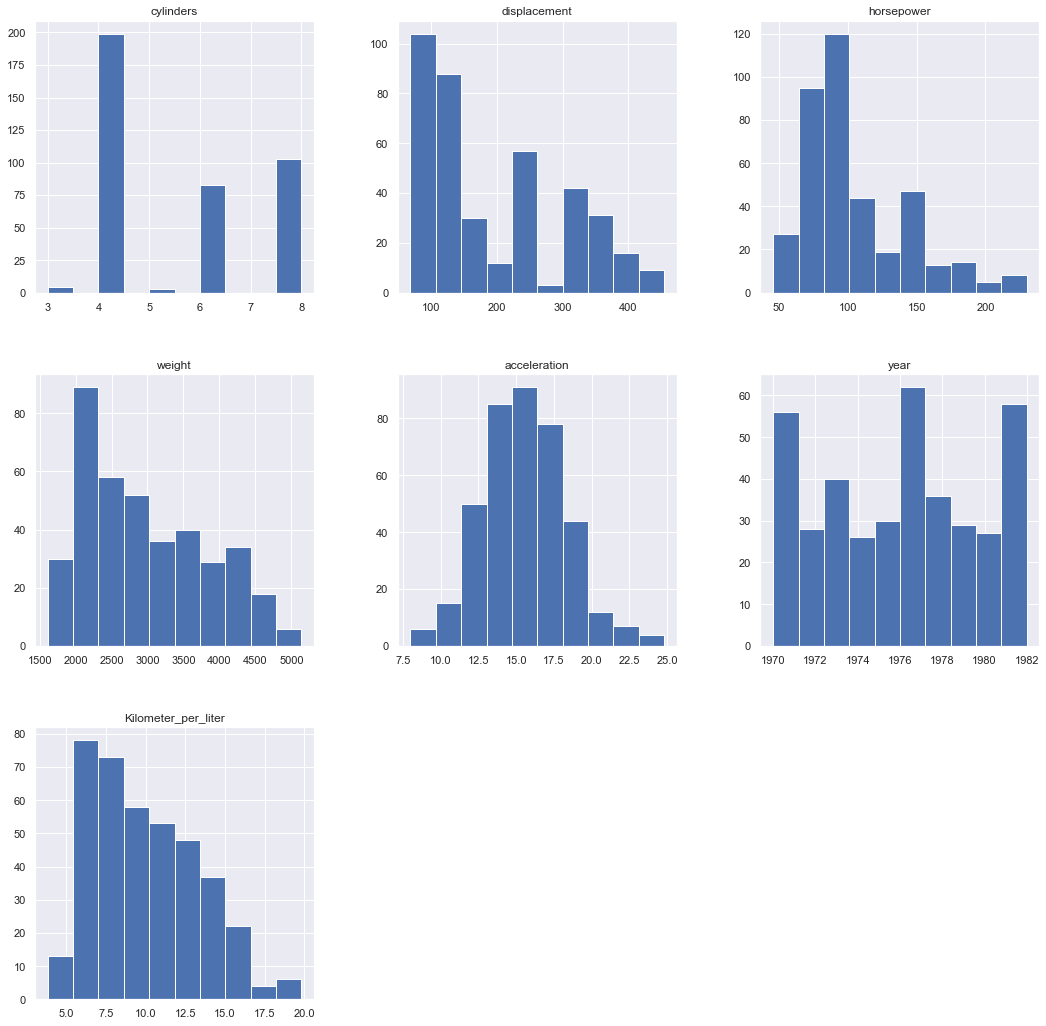

In [25]:
fig = data_1.hist(figsize=(18,18))

###### Univariate Analysis

- 1. Kilometer_per_liter

In [26]:
data_1.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\ANACONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

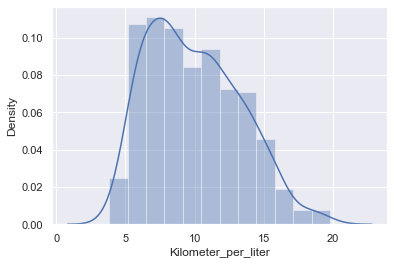

In [27]:
sns.distplot(data_1.Kilometer_per_liter)

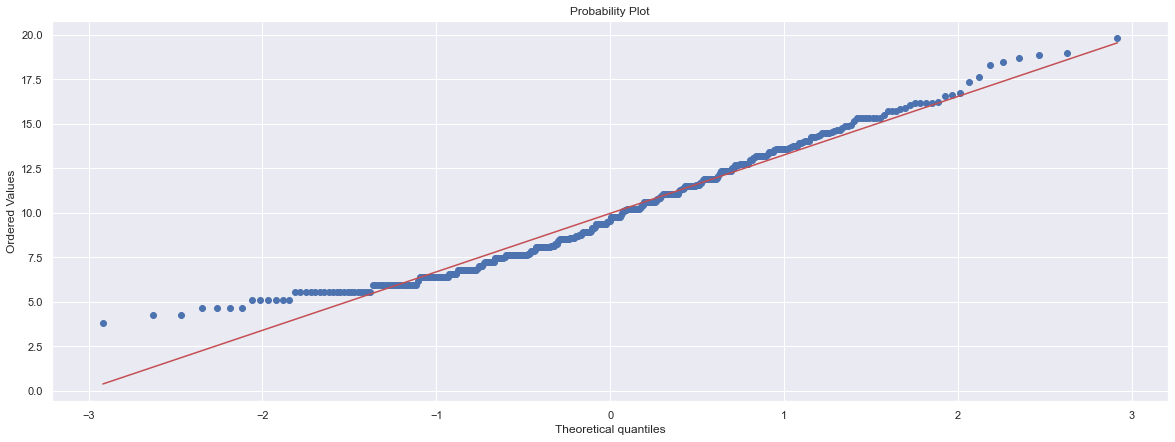

We expect that our data points will be on red line for Gaussian Distribution. We see dist tails


In [28]:
# qq plot:
plt.figure(figsize=(20,7))
stats.probplot(data['Kilometer_per_liter'],plot=plt)
plt.show()
print('We expect that our data points will be on red line for Gaussian Distribution. We see dist tails')

In [29]:
print('Skewness: %f' % data['Kilometer_per_liter'].skew())
print('Kurtosis: %f' % data['Kilometer_per_liter'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


Log Transformation

In [30]:
data_2 = data_1.copy(deep=True)

In [31]:
data_2['log_mileage']=np.log(data_2.Kilometer_per_liter)

In [32]:
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\ANACONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

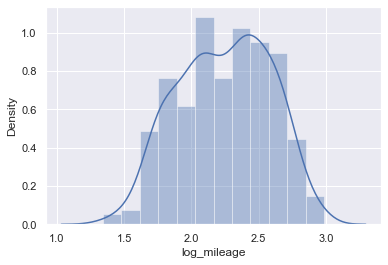

In [33]:
sns.distplot(data_2.log_mileage)

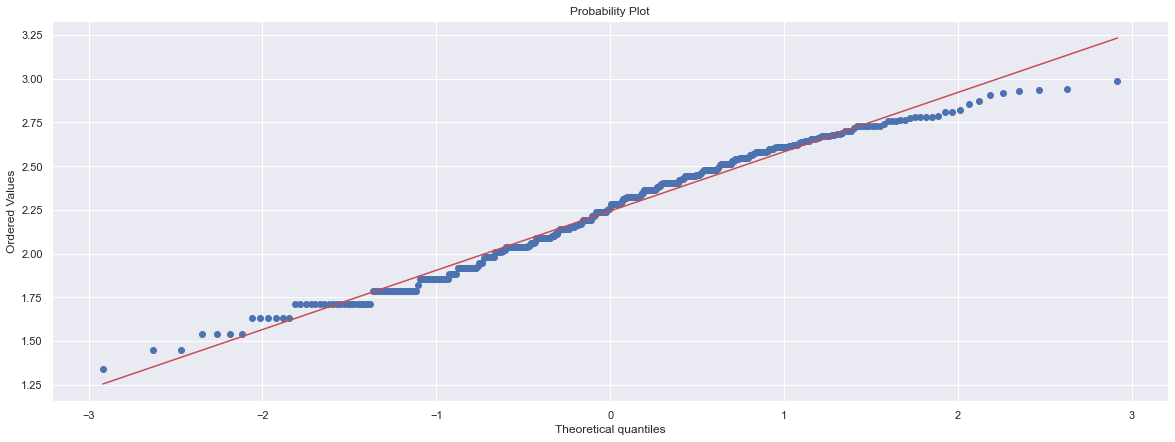

We expect that our data points will be on red line for Gaussian Distribution. We see dist tails


In [34]:
# qq plot:
plt.figure(figsize=(20,7))
stats.probplot(data_2.log_mileage,plot=plt)
plt.show()
print('We expect that our data points will be on red line for Gaussian Distribution. We see dist tails')

- 2. Distribution of Displacement

In [35]:
data_2.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

C:\ANACONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

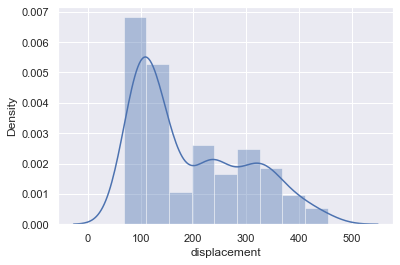

In [36]:
sns.distplot(data_2.displacement)

- 3. Analysis of Cylinder

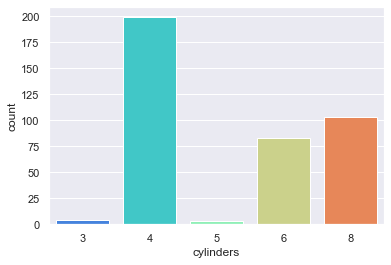

In [37]:
sns.countplot(x=data_2.cylinders, palette='rainbow')
plt.show()

In [38]:
data_3 = data_2.copy(deep=True)

In [39]:
data_3.cylinders = data_3.cylinders.astype('object')

In [40]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   manufacturer         392 non-null    object 
 9   model                392 non-null    object 
 10  log_mileage          392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 46.8+ KB


- 4. Analysis of model year

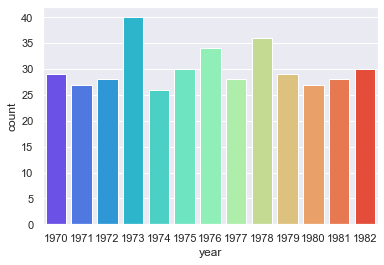

In [41]:
sns.countplot(x=data_3['year'], palette='rainbow')
plt.show()

- 5. Analysis of origin

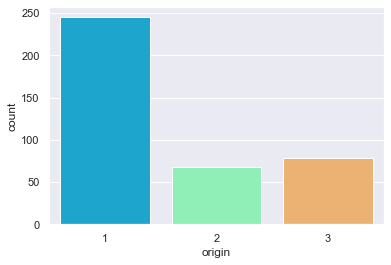

In [42]:
sns.countplot(x=data_3['origin'],palette='rainbow')
plt.show()

- 6. Analysis of horsepower

C:\ANACONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

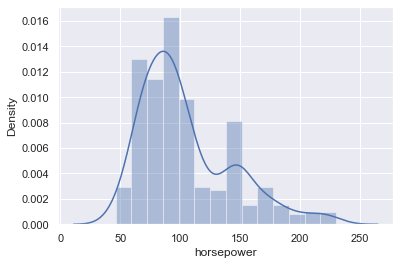

In [43]:
sns.distplot(data_3.horsepower)

- 7. Analysis of Manufacturer

Cars from 30 manufacturers (Top10)
----------  --
ford        48
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


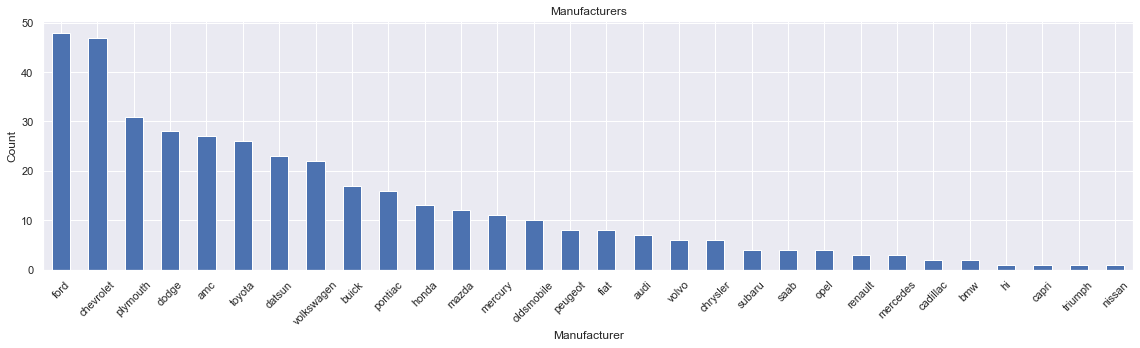

In [44]:
from tabulate import tabulate
print(f'Cars from {data_3.manufacturer.nunique()} manufacturers (Top10)')
print(tabulate(pd.DataFrame(data_3.manufacturer.value_counts()[:10])))

plt.figure(figsize=(16,5))
data_3.groupby('manufacturer')['manufacturer'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Manufacturers')
plt.ylabel('Count')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 8. Analysis of Model

293 car models (Top10)
--------  -
rabbit    5
corolla   5
pinto     5
matador   5
gremlin   4
hornet    4
maverick  4
impala    4
504       4
corona    4
--------  -


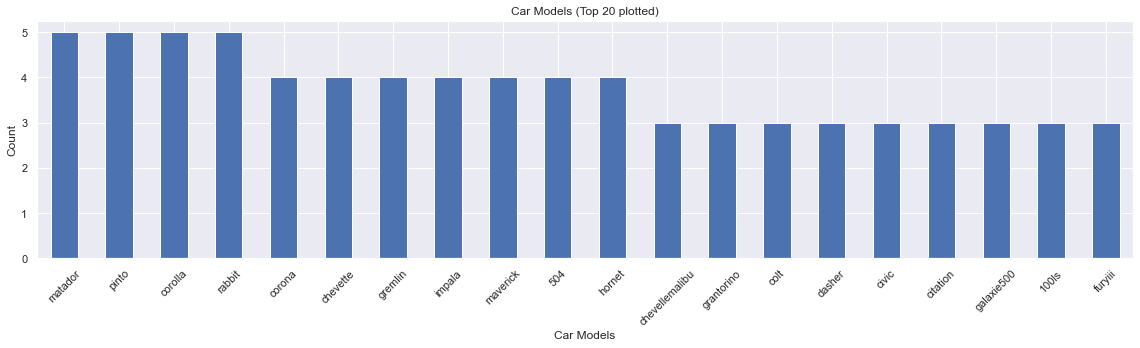

In [45]:
print(f'{data_3.model.nunique()} car models (Top10)')
print(tabulate(pd.DataFrame(data_3.model.value_counts()[:10])))

plt.figure(figsize=(16,5))
data_3.groupby('model')['model'].count().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Car Models (Top 20 plotted)')
plt.ylabel('Count')
plt.xlabel('Car Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Multivariate Analysis

- 1. Analysis of kilometer_per_liter with horsepower

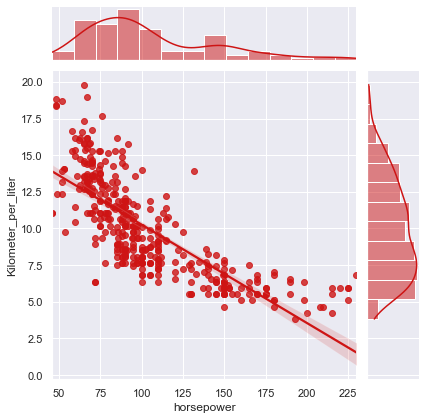

In [46]:
x = data_3[['Kilometer_per_liter','horsepower']]
sns.jointplot(x=x.loc[:,'horsepower'], y=x.loc[:,'Kilometer_per_liter'], kind='reg', color='#ce1414')

- 2. Analysis of kilometer_per_liter with weight

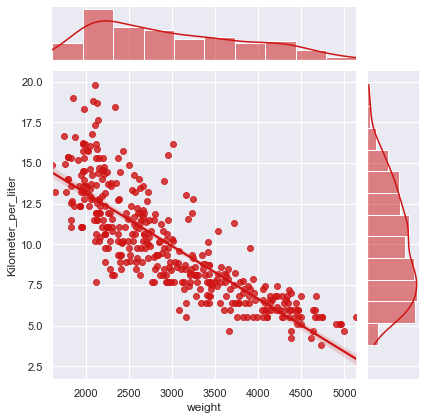

In [47]:
x = data_3[['Kilometer_per_liter','weight']]
sns.jointplot(x=x.loc[:,'weight'], y=x.loc[:,'Kilometer_per_liter'], kind='reg', color='#ce1414')

- 3. Analysis of kilometer_per_liter with acceleration

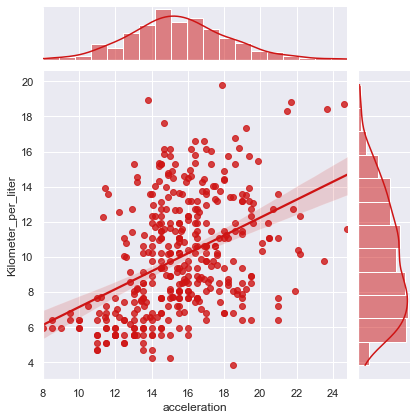

In [48]:
x = data_3[['Kilometer_per_liter','acceleration']]
sns.jointplot(x=x.loc[:,'acceleration'], y=x.loc[:,'Kilometer_per_liter'], kind='reg', color='#ce1414')

- 4. Analysis of kilometer_per_liter with displacement

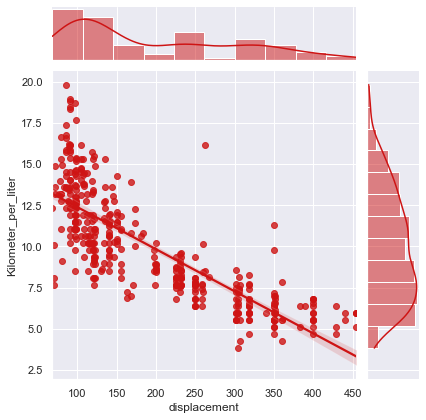

In [49]:
x = data_3[['Kilometer_per_liter','displacement']]
sns.jointplot(x=x.loc[:,'displacement'], y=x.loc[:,'Kilometer_per_liter'], kind='reg', color='#ce1414')

- 5. Analysis of kilometer_per_liter with cylinders

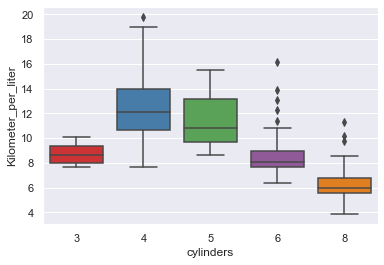

In [50]:
sns.boxplot(y='Kilometer_per_liter', x='cylinders', data=data_3, palette='Set1')
plt.show()

- 6. Analysis of Kilometer_per_liter with year

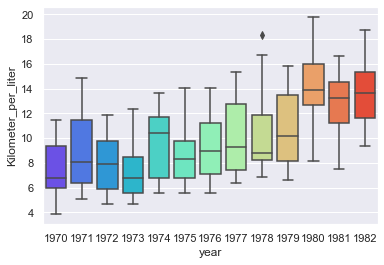

In [51]:
sns.boxplot(y='Kilometer_per_liter', x='year', data=data_3, palette='rainbow')
plt.show()

###### Covariance

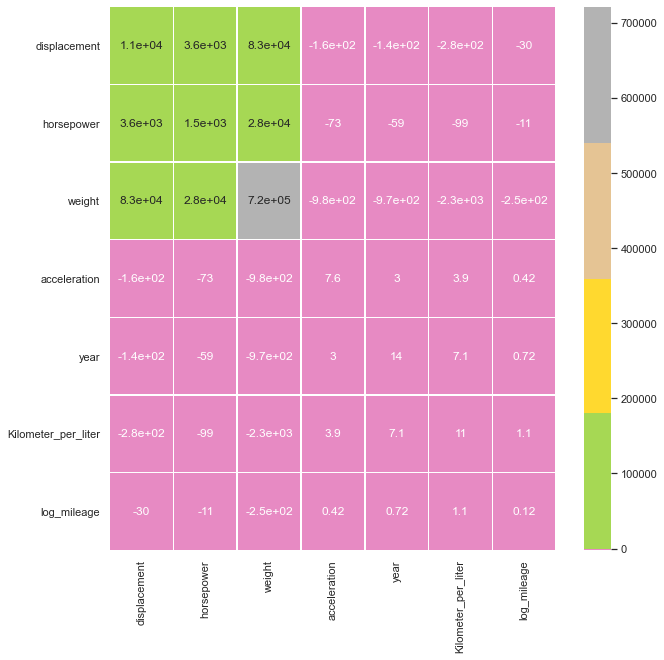

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(data_3.cov(), annot=True, linewidth=0.5, center=0, cmap='Set2')
plt.show()

###### Correlation

In [53]:
# Check correlation
data_num = data_3.drop(['Kilometer_per_liter','log_mileage','origin'],axis=1)
corr = data_num.corr()
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:>

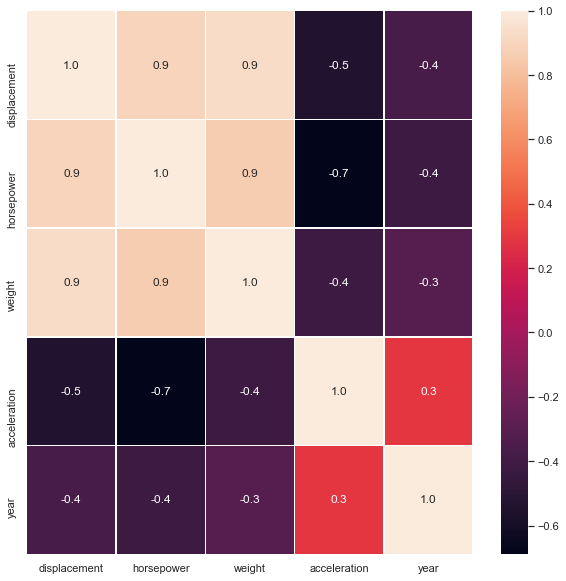

In [54]:
# Correlation map
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidth=0.5, fmt='.1f', ax=ax)

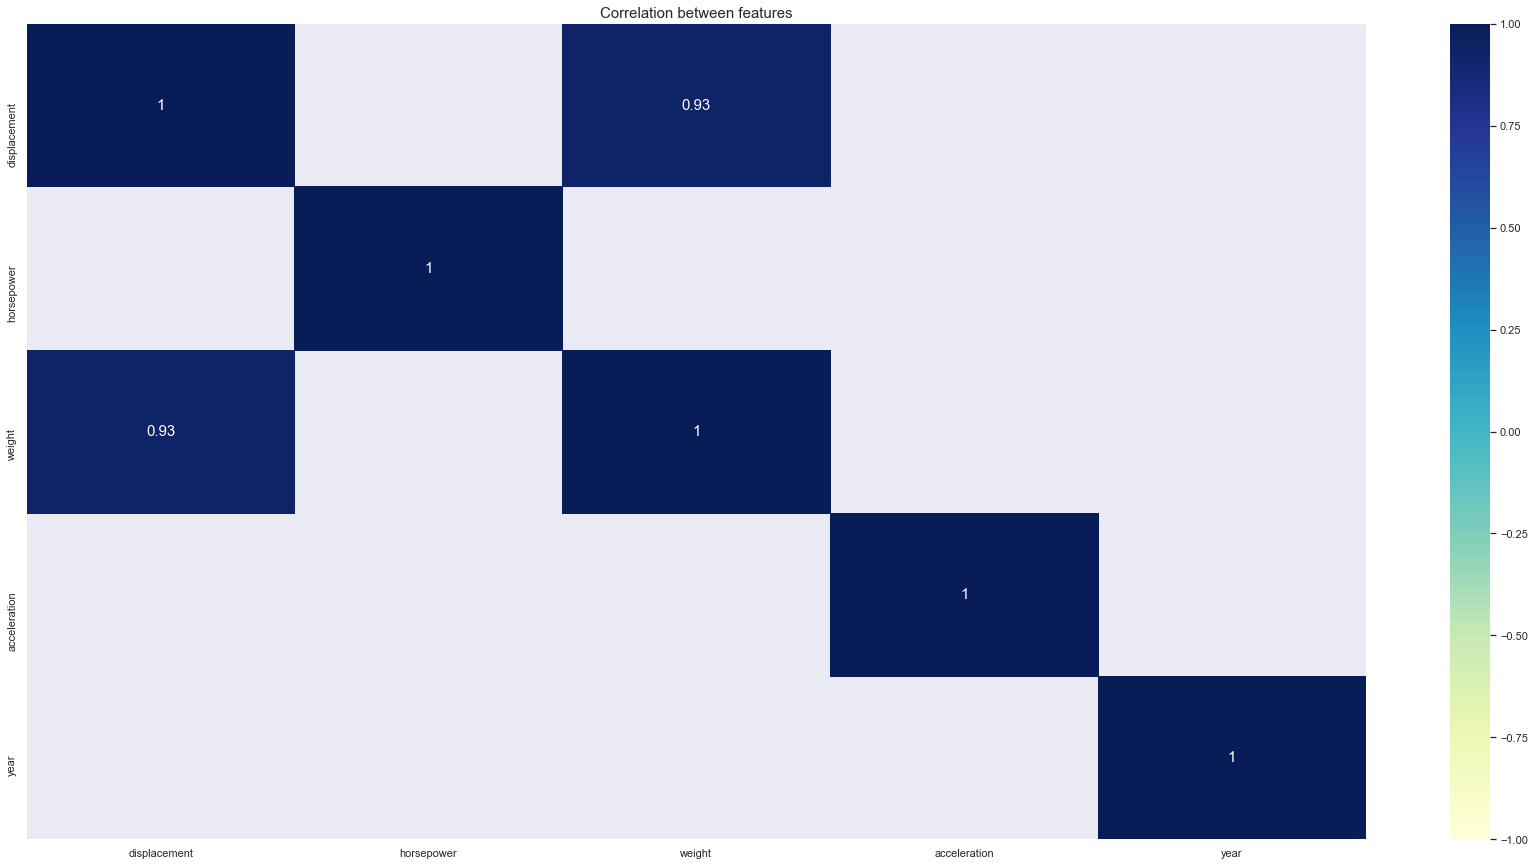

In [55]:
plt.figure(figsize=(30,15))
sns.heatmap(corr[(corr>=0.9)|(corr<=-0.9)],
           cmap='YlGnBu', vmax=1.0, vmin=-1.0,
           annot=True, annot_kws={'size':15})
plt.title('Correlation between features', fontsize=15)
plt.show()

In [56]:
drop_list = ['weight','displacement','manufacturer','model']
data_cleaned = data_3.drop(drop_list, axis=1)
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [57]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   log_mileage          392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 34.5+ KB


In [58]:
# Print the name of the columns
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'log_mileage'],
      dtype='object')

###### Label encoding for categorical data

In [59]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


###### Standardize data

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
x = data_with_dummies.drop(['Kilometer_per_liter','log_mileage'],axis=1)

In [62]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [63]:
x = scaler.fit_transform(x)

In [64]:
y = data_with_dummies.log_mileage

###### Split data into train and test 

In [65]:
from sklearn.model_selection import train_test_split
# Let us now split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=10)

# print the shape of 'x_train'
print('x_train',x_train.shape)

# print the shape of 'x_test'
print('x_test',x_test.shape)

# print the shape of 'y_train'
print('y_train',y_train.shape)

# print the shape of 'y_test'
print('y_test',y_test.shape)

x_train (313, 9)
x_test (79, 9)
y_train (313,)
y_test (79,)


###### Linear Regression

###### Ordinary Least square

###### 1. Build the model

In [66]:
from sklearn.linear_model import LinearRegression
# Build the model
OLS_model = LinearRegression()
# Fit the model
OLS_model.fit(x_train,y_train)

LinearRegression()

###### 2. Predict the values

In [67]:
# Predict the values
y_pred_OLS = OLS_model.predict(x_test)

Before we compute accuracy let's plot the predicted values

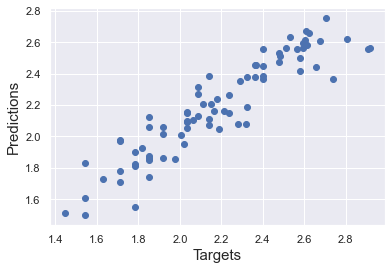

In [68]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets',size=15)
plt.ylabel('Predictions',size=15)
plt.show()

###### 3. Compute accuracy measures

In [76]:
# Compute the R-Squared
r_squared_OLS = OLS_model.score(x_train,y_train)
# R_squared is a statistical measure that represents the proportion
# of the variance for a dependent variable that's explained by 
# an independent variable or variables in a regression model.

# Number of observation or sample size
n=313

# Number of independent variables
p=9

# Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)
# Adjusted R-Squared is a modified version of R-Squared that has
# been adjusted for the number of predictors in the model.

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test,y_pred_OLS))
#The root-mean-square deviation or root-mean-square error is a frequently used measure of the
#differences between values predicted by a model or an estimator and the values observed

In [77]:
# Create a list of column names
cols = ['Model','R-squared','Adj R-squared','RMSE']

# Create an empty dataframe of the columns
result_tabulation = pd.DataFrame(columns=cols)

# Compiling the required information
OLS_metrics = pd.Series({'Model':'OLS',
                        'R-Squared': r_squared_OLS,
                        'Adj R-squared':Adj_r_squared_OLS,
                        'RMSE':rmse_OLS})

# Appending our result table
result_tabulation = result_tabulation.append(OLS_metrics,ignore_index=True)

# View the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE,R-Squared
0,OLS,NaN,0.859775,0.135834,0.86382


###### SGD

###### 1. Build the model

In [71]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss='squared_loss',alpha=0.1,max_iter=1000)
# alpha: float, default=0.0001
# constant that multiplies the regularization term. The higher the value, the stronger the regularization.
# max_iter: int, default=1000
# The maximum number of passes over the training data(aka epochs)

# fit the model
SGD_model.fit(x_train,y_train)

SGDRegressor(alpha=0.1)

###### 2. Make Predictions

In [72]:
# Predict the values
y_pred_SGD = SGD_model.predict(x_test)

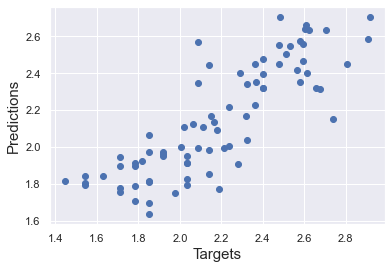

In [73]:
plt.scatter(y_test,y_pred_SGD)
plt.xlabel('Targets',size=15)
plt.ylabel('Predictions',size=15)
plt.show()

In [74]:
r_squared_SGD = SGD_model.score(x_train,y_train)

n=313
p=9

Adj_r_squared_SGD = 1-(1-r_squared_SGD)*(n-1)/(n-p-1)

rmse_SGD =sqrt(mean_squared_error(y_test,y_pred_SGD))

In [75]:
SGD_metrics = pd.Series({'Model':'SGD',
                        'R-Squared': r_squared_SGD,
                        'Adj R-squared':Adj_r_squared_SGD,
                        'RMSE':rmse_SGD})
result_tabulation = result_tabulation.append(SGD_metrics,ignore_index=True)
result_tabulation

,Model,R-squared,Adj R-squared,RMSE,R-Squared
0,OLS,NaN,0.859775,0.135834,0.863820
1,SGD,NaN,0.722890,0.196263,0.730883
